### Import the libaries

In [ ]:
## EDA via word cloud, time distribution of posts, words
## can we pick up the keywords googlehome 
## add googlehome and alexa to the stop words 
# slides of 20 (5mins)

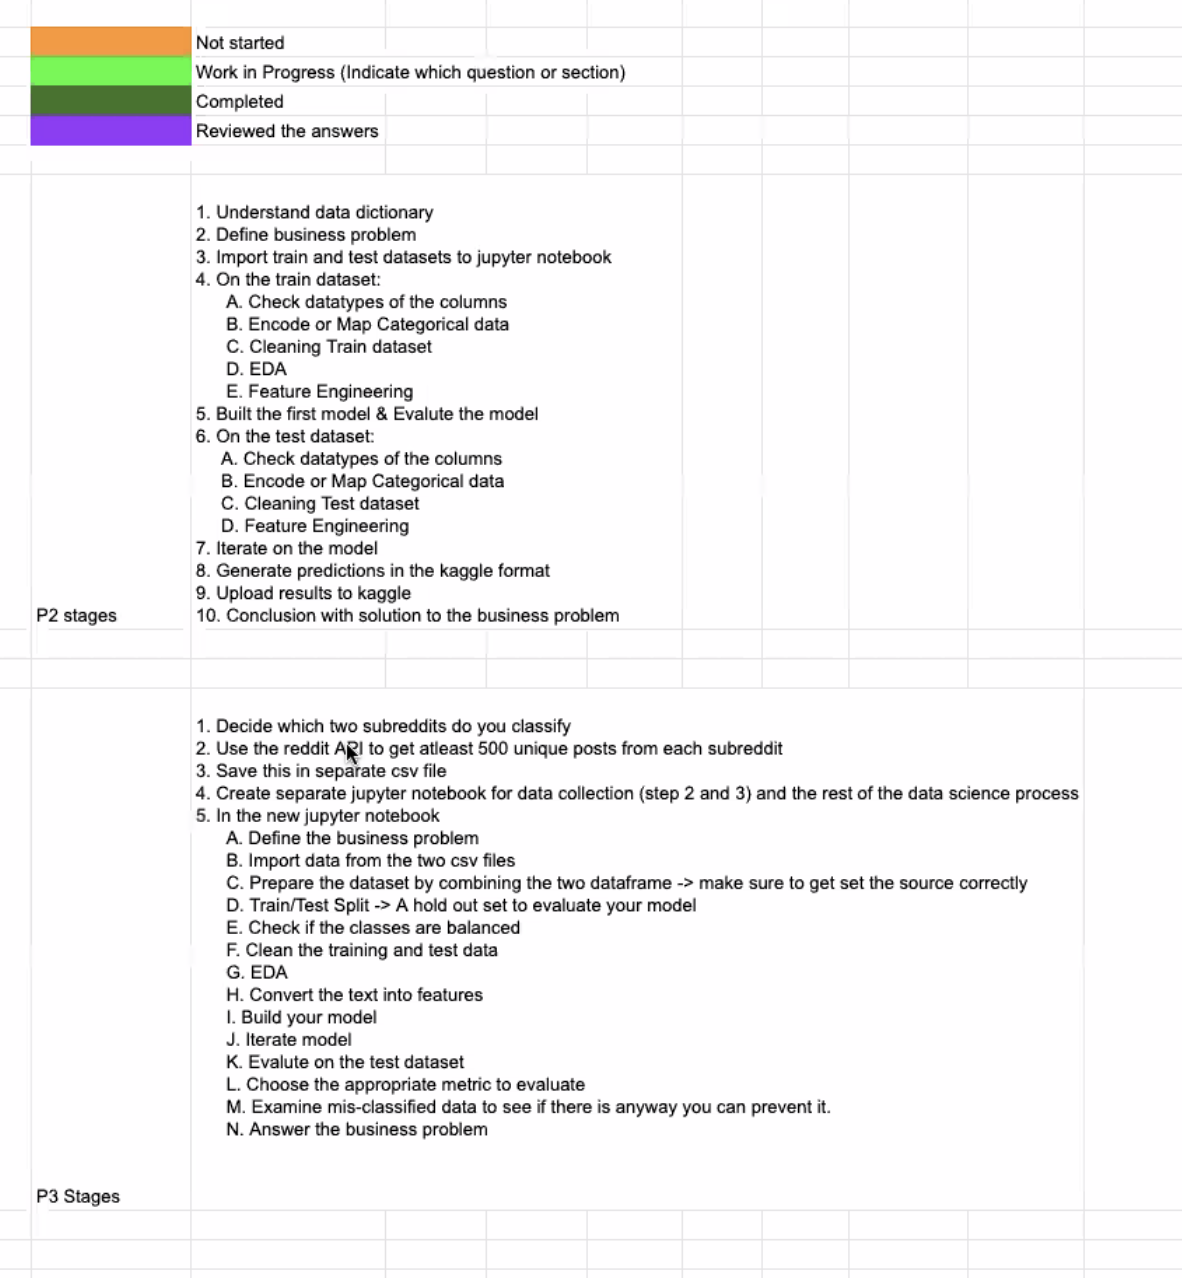

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split, GridSearchCV
import nltk
from nltk.stem.porter import PorterStemmer
#from nltk.stem import WordNetLemmatizer
import re
#from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords as st
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud, STOPWORDS 

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Import the dataframes

In [4]:
al=pd.read_csv("alexa.csv")
gh=pd.read_csv("googlehome.csv")

In [5]:
al.shape

(2707, 111)

In [11]:
al.head()

subreddit                                           selftext  \
0  amazonecho  Post your requested features here, and vote on...   
1  amazonecho  I can't use the speakers on my laptop so I con...   
2  amazonecho                                                NaN   
3  amazonecho  I'm new to how Echo's work so maybe this is ob...   
4  amazonecho  TL;DR Amazon Echo for older grandparents, reco...   

                                               title  
0                Monthly Echo Feature Request Thread  
1  Anyone know how to get Echo to stop announcing...  
2  Alexa keeps doing this and won't respond to vo...  
3  Help - Echo plays Italian Podcast when I ask i...  
4                Echo -make it work for Grandparents

In [7]:
print(al.columns)

Index(['approved_at_utc', 'subreddit', 'selftext', 'author_fullname', 'saved',
       'mod_reason_title', 'gilded', 'clicked', 'title', 'link_flair_richtext',
       ...
       'media', 'is_video', 'post_hint', 'preview', 'link_flair_template_id',
       'author_cakeday', 'crosspost_parent_list', 'crosspost_parent',
       'media_metadata', 'poll_data'],
      dtype='object', length=111)


In [13]:
al=al[['subreddit','selftext','title']]

In [14]:
al.shape

(2707, 3)

In [15]:
al.isnull().sum()

subreddit      0
selftext     252
title          0
dtype: int64

In [16]:
al['selftext'].fillna("",inplace=True)

In [17]:
al['subreddit'].unique()

array(['amazonecho'], dtype=object)

In [18]:
al=al.assign(text=al['selftext'].astype(str)+ " "+ al['title'].astype(str))

In [19]:
al.head()

subreddit                                           selftext  \
0  amazonecho  Post your requested features here, and vote on...   
1  amazonecho  I can't use the speakers on my laptop so I con...   
2  amazonecho                                                      
3  amazonecho  I'm new to how Echo's work so maybe this is ob...   
4  amazonecho  TL;DR Amazon Echo for older grandparents, reco...   

                                               title  \
0                Monthly Echo Feature Request Thread   
1  Anyone know how to get Echo to stop announcing...   
2  Alexa keeps doing this and won't respond to vo...   
3  Help - Echo plays Italian Podcast when I ask i...   
4                Echo -make it work for Grandparents   

                                                text  
0  Post your requested features here, and vote on...  
1  I can't use the speakers on my laptop so I con...  
2   Alexa keeps doing this and won't respond to v...  
3  I'm new to how Echo's work so maybe this is ob...  
4  TL;DR Amazon Echo for older grandparents, reco...

In [20]:
al.drop(['selftext','title'],axis=1,inplace=True)

In [21]:
al.drop_duplicates(inplace=True)

In [22]:
al.shape

(988, 2)

In [23]:
al

subreddit                                               text
0    amazonecho  Post your requested features here, and vote on...
1    amazonecho  I can't use the speakers on my laptop so I con...
2    amazonecho   Alexa keeps doing this and won't respond to v...
3    amazonecho  I'm new to how Echo's work so maybe this is ob...
4    amazonecho  TL;DR Amazon Echo for older grandparents, reco...
5    amazonecho  Hi,\n\nI'm losing my mind here. My echo has be...
6    amazonecho  Just bought them a dot so I can send my mom me...
7    amazonecho  I'm looking to upgrade my echo dot. I have som...
8    amazonecho   Anyone else having this issue..... My Echo 2n...
9    amazonecho   Hi, I'm trying to program a Lasko 2551 Fan to...
10   amazonecho  My echo show started giving me suggestions thi...
11   amazonecho  Is there a way to transfer a call from an Ipho...
12   amazonecho   New version of Alexa app crash when I click o...
13   amazonecho  This only started being an issue recently, and...
14   amazonecho  if I change my router's wifi password, does th...
15   amazonecho  My echo dot started to only play radios on Spo...
16   amazonecho  Hi so I’m having trouble controlling all my sm...
17   amazonecho  My Echo's audio via Bluetooth keeps stuttering...
18   amazonecho  Have a very very strange problem. Here in New ...
19   amazonecho  Hello,\n\nI want my echo to feel more personal...
20   amazonecho  I connected my Echo Dot to my PC using bluetoo...
21   amazonecho  Hiya.  I have an Echo and a Dot, both 2nd gen ...
22   amazonecho  I use my echo devices to keep me on track in t...
23   amazonecho  Something crazy just occurred. I was in the sh...
24   amazonecho  I have an Echo Dot and it has had several temp...
25   amazonecho  If you haven't hear Wink is extorting their us...
26   amazonecho  Hi there, \n\nI’m looking to purchase a Echo f...
27   amazonecho  I have the Bluetooth Audio Technica lp 60 reco...
28   amazonecho  I live in a studio so to simulate having a stu...
29   amazonecho  Hi guys, cannot find any relevant information ...
30   amazonecho  I subscribe to Showtime through Amazon is it p...
31   amazonecho  When I give an announcement, is there a way fo...
32   amazonecho  Hi, I want to suspend my Echos from the ceilin...
33   amazonecho  I will say “Alexa play blink182” or whatever s...
34   amazonecho  I’ve been having problems for the past week wi...
35   amazonecho  I'm wanting to add a simple smart button for a...
36   amazonecho  After I snooze the echo dot 3 for a second tim...
37   amazonecho  My internet (Comcast) has been down for days i...
38   amazonecho  Hi. I have an echo studio connected to my fire...
39   amazonecho  Anyone else having problems playing SiriusXM s...
40   amazonecho  I currently have the Toshiba 4K Fire T.V and w...
41   amazonecho  My echo refuses to play spotify. It says that ...
42   amazonecho  I know I may be in the minority bit but is the...
43   amazonecho  I seem to be having a hard time getting skype ...
44   amazonecho  We can never hear mum on her echo. She can be ...
45   amazonecho  I had my nest synced up with the amazon echo w...
46   amazonecho  Suddenly can't connect to Spotify. Tried every...
47   amazonecho  Whenever I try to drop in on the show from my ...
48   amazonecho  Does anyone have this problem? I can only play...
49   amazonecho  I have a minor inconvenience.  Whenever I get ...
50   amazonecho  There has been some confusion about whether th...
51   amazonecho  Hi there,\n\nAs a Mother's Day present I got m...
52   amazonecho  My parent's house is set up with Phillips Hue ...
53   amazonecho  Hey everyone. I just got an Echo Show 8 today,...
54   amazonecho   Echo (3rd Gen)- Smart speaker with Alexa- Cha...
55   amazonecho  Hey /r/AmazonEcho\n\n\*\*What features are you...
56   amazonecho  Title. It's driving me nuts. The best feature ...
57   amazonecho  If I disable UPnP from my router, will my echo...
58   amazonecho  Yes, I know that Comply makes tips s

### EDA - Generate a WordCloud for pre-processed Alexa file

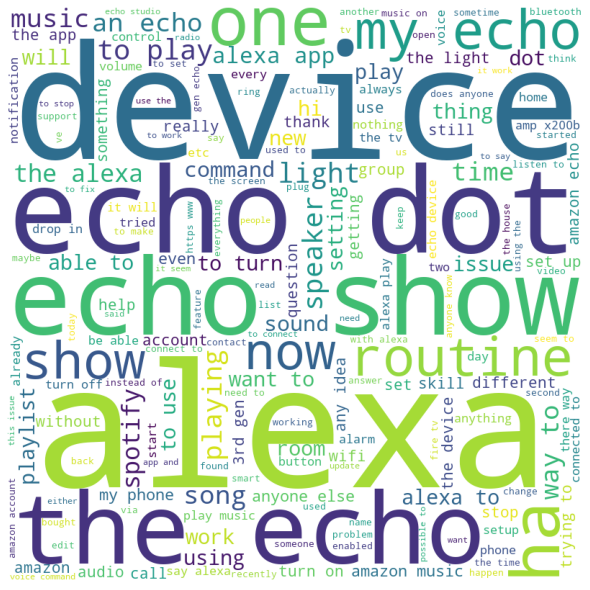

In [24]:
al_text=[i for i in al['text']]
comment_words = '' 
stopwords = set(STOPWORDS) 
  
for val in al_text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

#### Observation:
- Keywords like alexa, device, echo and dot are prominent and we will attempt to add them to the stop words when building our model

In [25]:
al['text'][986]

"Hello,\n\nI've had my echo devices (two of them) for a little over a year. Two weeks ago my reminders stopped giving me push notifications. I didn't change anything in my settings, didn't lose power or internet, and didn't change phones or devices.\n\nI've looked at all the settings in the Alexa App on my iPhone and they are all correct still, as well as my overall device settings for notifications are correct.\n\nIs there any fix for this? Push notifications for reminders stopped?"

In [26]:
gh.shape

(1326, 110)

In [27]:
gh=gh[['subreddit','selftext','title']]

In [28]:
gh.isnull().sum()

subreddit      0
selftext     242
title          0
dtype: int64

In [29]:
gh['selftext'].fillna("",inplace=True)

In [30]:
gh['subreddit'].unique()

array(['googlehome'], dtype=object)

In [31]:
gh=gh.assign(text=gh['selftext'].astype(str)+ " "+ gh['title'].astype(str))

In [32]:
gh.head()

subreddit                                           selftext  \
0  googlehome  [\[FAQ - Frequently Asked Questions\]](https:/...   
1  googlehome  Do you want to liberate your Google so it can ...   
2  googlehome                                                      
3  googlehome  Hey Google, set a timer for 1 hour and 30 minu...   
4  googlehome  It all started last night, when my Home Mini w...   

                                               title  \
0  FAQ: Please read the subreddit FAQ before post...   
1  My Google has Coronavirus! - Monthly Rants and...   
2  I think I found a way around it until it works...   
3  Oh my god how do you set a timer for 1 hour an...   
4                      Google Home Mini muted itself   

                                                text  
0  [\[FAQ - Frequently Asked Questions\]](https:/...  
1  Do you want to liberate your Google so it can ...  
2   I think I found a way around it until it work...  
3  Hey Google, set a timer for 1 hour and 30 minu...  
4  It all started last night, when my Home Mini w...

In [33]:
gh.drop(['selftext','title'],axis=1,inplace=True)

In [34]:
gh.drop_duplicates(inplace=True)

In [35]:
gh.shape

(998, 2)

### EDA - Generate a WordCloud for pre-processed Googlehome file

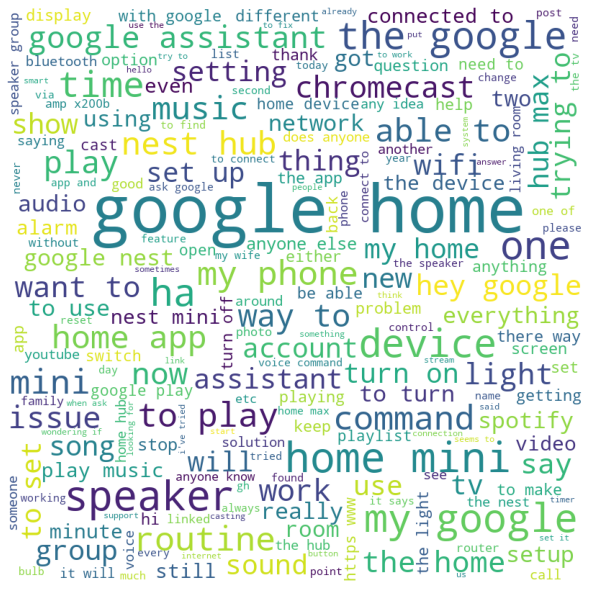

In [36]:
gh_text=[i for i in gh['text']]
comment_words = '' 
stopwords = set(STOPWORDS) 
  
for val in gh_text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

#### Observation:
- Keywords like google, home and mini are prominent and we will attempt to add them to the stop words when building our model

### Merging the 2 datasets

In [37]:
df=al.append(gh)

In [38]:
df.shape

(1986, 2)

In [39]:
df.columns=['label','message']

In [40]:
df.head()

label                                            message
0  amazonecho  Post your requested features here, and vote on...
1  amazonecho  I can't use the speakers on my laptop so I con...
2  amazonecho   Alexa keeps doing this and won't respond to v...
3  amazonecho  I'm new to how Echo's work so maybe this is ob...
4  amazonecho  TL;DR Amazon Echo for older grandparents, reco...

### Label the target (GoogleHome =1 and Alexa =0)

In [41]:
df['label'] = df['label'].map({'amazonecho': 0, 'googlehome': 1})
df.head()

label                                            message
0      0  Post your requested features here, and vote on...
1      0  I can't use the speakers on my laptop so I con...
2      0   Alexa keeps doing this and won't respond to v...
3      0  I'm new to how Echo's work so maybe this is ob...
4      0  TL;DR Amazon Echo for older grandparents, reco...

In [42]:
df.isnull().sum()

label      0
message    0
dtype: int64

### EDA - Generate a WordCloud for combined data file

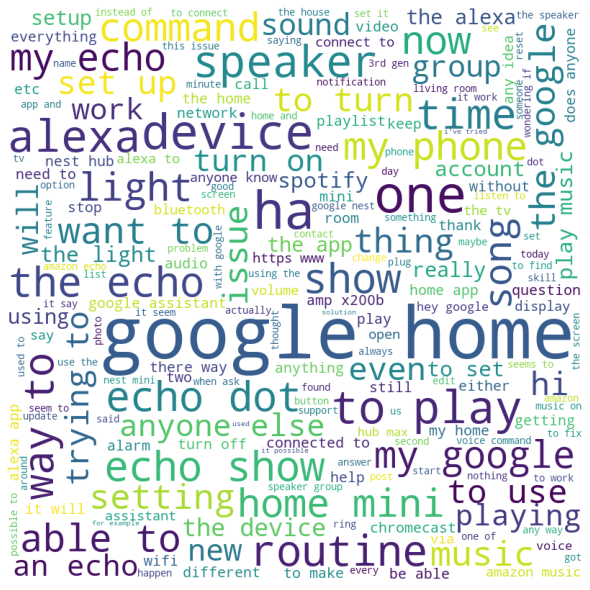

In [43]:
df_text=[i for i in df['message']]
comment_words = '' 
stopwords = set(STOPWORDS) 
  
for val in df_text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Set up our data for modeling

In [44]:
X = df[['message']]
y = df['label']

In [45]:
y.value_counts(normalize=True)

1    0.502518
0    0.497482
Name: label, dtype: float64

In [46]:
y.value_counts()

1    998
0    988
Name: label, dtype: int64

#### Baseline_score = 0.502

In [47]:
# Create train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 42)

In [48]:
p_stemmer=PorterStemmer()

### Adding new Stop Words to the original list  

In [49]:
st = nltk.corpus.stopwords.words('english')
newStopWords = ['googl','chromecast','gh', 'google', 'home', 'mini','amazon','alexa', 'device', 'echo', 'dot','show']
st.extend(newStopWords)

In [50]:
def review_to_words(raw_review):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    
    # 1. Remove HTML.
    review_text = BeautifulSoup(raw_review).get_text()
    
    # 2. Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    
    # 3. Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    # 4. In Python, searching a set is much faster than searching
    # a list, so convert the stopwords to a set.
    #stops = set(st.words('english'))
    stops = set(st)
    
    # 5. Remove stopwords.
    meaningful_words = [w for w in words if w not in stops]
    
    # 5i. Stemming of words.
    meaningful_words=[p_stemmer.stem(w) for w in words]
    
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(meaningful_words))


In [51]:
# Get the number of messages based on the dataframe size.
total_messages = X.shape[0]
print(f'There are {total_messages} messages.')

There are 1986 messages.


In [52]:
# Initialize an empty list to hold the clean messages.
clean_train_message = []
clean_test_message = []

print("Cleaning and parsing the training set messages...")

# Instantiate counter.
j = 0

# For every message in our training set...
for train_message in X_train['message']:
    
    # Convert messages to words, then append to clean_train_message.
    clean_train_message.append(review_to_words(train_message))
    
    # If the index is divisible by 100, print a message.
    if (j + 1) % 100 == 0:
        print(f'Message {j + 1} of {total_messages}.')
    
    j += 1

# Let's do the same for our testing set.
print("Cleaning and parsing the testing set messages...")

# For every message in our testing set...
for test_message in X_test['message']:
    
    # Convert messages to words, then append to clean_train_message.
    clean_test_message.append(review_to_words(test_message))
    
    # If the index is divisible by 100, print a message.
    if (j + 1) % 100 == 0:
        print(f'Message {j + 1} of {total_messages}.')
        
    j += 1

Cleaning and parsing the training set messages...
Message 100 of 1986.
Message 200 of 1986.
Message 300 of 1986.
Message 400 of 1986.
Message 500 of 1986.
Message 600 of 1986.
Message 700 of 1986.
Message 800 of 1986.
Message 900 of 1986.
Message 1000 of 1986.
Message 1100 of 1986.
Message 1200 of 1986.
Message 1300 of 1986.
Message 1400 of 1986.
Cleaning and parsing the testing set messages...
Message 1500 of 1986.
Message 1600 of 1986.
Message 1700 of 1986.
Message 1800 of 1986.
Message 1900 of 1986.


In [53]:
# Import CountVectorizer.
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate the "CountVectorizer" object

cvec = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = st,
                             max_features = 5000) 

In [54]:
#Fitting the model

train_data_features = cvec.fit_transform(clean_train_message)

test_data_features = cvec.transform(clean_test_message)

In [55]:
print(train_data_features.shape)

(1489, 4329)


In [56]:
print(test_data_features.shape)

(497, 4329)


In [57]:
vocab = cvec.get_feature_names()
print(vocab)

['aaaaragh', 'aac', 'abacab', 'abba', 'abd', 'abil', 'abl', 'abound', 'abov', 'abroad', 'abruptli', 'absolut', 'absoust', 'abstract', 'abysm', 'ac', 'accent', 'accept', 'access', 'accident', 'accomplish', 'accord', 'account', 'accumul', 'accur', 'accuraci', 'accuweath', 'achiev', 'acknowledg', 'acquisit', 'across', 'acss', 'act', 'action', 'activ', 'activit', 'actual', 'ad', 'adapt', 'add', 'addict', 'addit', 'address', 'adequ', 'adhes', 'adjust', 'admir', 'admittedli', 'adress', 'advanc', 'advantag', 'adventur', 'advertis', 'advic', 'advis', 'ae', 'aerosmith', 'aesthet', 'af', 'afar', 'affect', 'afford', 'afl', 'afraid', 'afternoon', 'afterthought', 'age', 'aggrav', 'aggress', 'ago', 'agre', 'agreement', 'aha', 'ahead', 'ahv', 'ai', 'aid', 'aim', 'air', 'airbnb', 'airplay', 'airpod', 'airport', 'aiwg', 'aiy', 'aka', 'alabama', 'alarm', 'alart', 'albeit', 'album', 'aldolfo', 'alert', 'alex', 'alexia', 'alf', 'algorithm', 'aliv', 'allow', 'almost', 'alon', 'along', 'alongsid', 'alot', '

In [58]:
train_df=pd.DataFrame(train_data_features.toarray(),columns=cvec.get_feature_names())
train_df.head(10)

aaaaragh  aac  abacab  abba  abd  abil  abl  abound  abov  abroad  \
0         0    0       0     0    0     1    1       0     0       0   
1         0    0       0     0    0     0    0       0     0       0   
2         0    0       0     0    0     0    0       0     1       0   
3         0    0       0     0    0     0    1       0     0       0   
4         0    0       0     0    0     0    0       0     0       0   
5         0    0       0     0    0     0    0       0     0       0   
6         0    0       0     0    0     0    0       0     0       0   
7         0    0       0     0    0     0    0       0     0       0   
8         0    0       0     0    0     0    0       0     0       0   
9         0    0       0     0    0     0    0       0     0       0   

   abruptli  absolut  absoust  abstract  abysm  ac  accent  accept  access  \
0         0        0        0         0      0   0       0       0       0   
1         0        0        0         0      0   0       0       0       0   
2         0        0        0         0      0   0       0       0       1   
3         0        0        0         0      0   0       0       0       0   
4         0        0        0         0      0   0       0       0       0   
5         0        0        0         0      0   0       0       0       0   
6         0        0        0         0      0   0       0       0       1   
7         0        0        0         0      0   0       0       0       0   
8         0        0        0         0      0   0       0       0       0   
9         0        0        0         0      0   0       0       0       0   

   accident  accomplish  accord  account  accumul  accur  accuraci  accuweath  \
0         0           0       0        0        0      0         0          0   
1         0           0       0        1        0      0         0          0   
2         0           0       0        0        0      0         0          0   
3         0           0       0        1        0      0         0          0   
4         0           0       0        0        0      0         0          0   
5         0           0       0        0        0      0         0          0   
6         0           0       0        0        0      0         0          0   
7         0           0       0        0        0      0         0          0   
8         0           0       0        0        0      0         0          0   
9         0           0       0        0        0      0         0          0   

   achiev  acknowledg  acquisit  across  acss  act  action  activ  activit  \
0       0           0         0       0     0    0       0      0        0   
1       0           0         0       0     0    0       0      0        0   
2       0           0         0       0     0    0       0      0        0   
3       0           0         0       0     0    0       0      0        0   
4       0           0         0       0     0    0       0      0        0   
5       0           0         0       0     0    0       0      0        0   
6       0           0         0       0     0    0       0      0        0   
7       0           0         0       0     0    0       0      0        0   
8       0           0         0       0     0    0       0      0        0   
9       0           0         0       0     0    0       0      0        0   

   actual  ad  adapt  add  addict  addit  address  adequ  adhes  adjust  \
0       0   0      0    0       0      0        0      0      0       0   
1       0   0      0    0       0      0        0      0      0       0   
2       0   1      0    2       0      0        0      0      0       0   
3       0   0      0    0       0      0        0      0      0       0   
4       0   0      0    0       0      0        0      0      0       0   
5       0   0      0    0       0      0        0      0      0       0   
6       0   0      0    0       0      0        0      0      0       0   


In [59]:
test_df=pd.DataFrame(test_data_features.toarray(),columns=cvec.get_feature_names())
test_df.head(10)

aaaaragh  aac  abacab  abba  abd  abil  abl  abound  abov  abroad  \
0         0    0       0     0    0     0    0       0     0       0   
1         0    0       0     0    0     0    0       0     0       0   
2         0    0       0     0    0     0    0       0     0       0   
3         0    0       0     0    0     0    0       0     0       0   
4         0    0       0     0    0     0    0       0     0       0   
5         0    0       0     0    0     0    0       0     0       0   
6         0    0       0     0    0     0    0       0     0       0   
7         0    0       0     0    0     0    0       0     0       0   
8         0    0       0     0    0     0    0       0     0       0   
9         0    0       0     0    0     0    1       0     0       0   

   abruptli  absolut  absoust  abstract  abysm  ac  accent  accept  access  \
0         0        0        0         0      0   0       0       0       0   
1         0        0        0         0      0   0       0       0       0   
2         0        0        0         0      0   0       0       0       0   
3         0        0        0         0      0   0       0       0       0   
4         0        0        0         0      0   0       0       0       0   
5         0        0        0         0      0   0       0       0       0   
6         0        0        0         0      0   0       0       0       0   
7         0        0        0         0      0   0       0       0       0   
8         0        0        0         0      0   0       0       0       0   
9         0        0        0         0      0   0       0       0       0   

   accident  accomplish  accord  account  accumul  accur  accuraci  accuweath  \
0         0           0       0        0        0      0         0          0   
1         0           0       0        0        0      0         0          0   
2         0           0       0        0        0      0         0          0   
3         0           0       0        0        0      0         0          0   
4         0           1       1        0        0      0         0          0   
5         0           0       0        0        0      0         0          0   
6         0           0       0        0        0      0         0          0   
7         0           0       0        0        0      0         0          0   
8         0           0       0        0        0      0         0          0   
9         0           0       0        0        0      0         0          0   

   achiev  acknowledg  acquisit  across  acss  act  action  activ  activit  \
0       0           0         0       0     0    0       0      0        0   
1       0           0         0       0     0    0       0      0        0   
2       0           0         0       0     0    0       0      0        0   
3       0           0         0       0     0    0       0      0        0   
4       0           0         0       0     0    0       0      1        0   
5       0           0         0       0     0    0       0      0        0   
6       0           0         0       0     0    0       0      0        0   
7       0           0         0       0     0    0       0      0        0   
8       0           0         0       0     0    1       0      0        0   
9       0           0         0       0     0    0       0      0        0   

   actual  ad  adapt  add  addict  addit  address  adequ  adhes  adjust  \
0       0   2      0    0       0      0        0      0      0       0   
1       0   0      0    0       0      0        0      0      0       0   
2       0   0      0    0       0      0        0      0      0       0   
3       0   0      0    0       0      0        0      0      0       0   
4       2   0      0    0       0      0        0      0      0       0   
5       0   0      0    0       0      0        0      0      0       0   
6       0   0      0    0       0      0        0      0      0       0   


In [60]:
test_df.shape

(497, 4329)

## Model 1: Logistic Regression

In [61]:
# Instantiate logistic regression model.
lr = LogisticRegression(solver='lbfgs',max_iter=1000)

# Fit model to training data.
lr.fit(train_data_features,y_train)

# Evaluate model on training data.
lr.score(train_data_features,y_train)

0.9912693082605776

In [62]:
print(f'Logistic Regression Intercept: {lr.intercept_}')
print(f'Logistic Regression Coefficient: {lr.coef_}')

Logistic Regression Intercept: [0.32750306]
Logistic Regression Coefficient: [[-1.17253269e-01  7.22063723e-02 -2.02362063e-05 ...  1.18472671e-01
   3.84056021e-04  4.65137914e-02]]


In [63]:
lr.score(test_data_features,y_test)

0.7404426559356136

In [ ]:
Note: 

In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
predictions = lr.predict(test_data_features)

In [66]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
tn, fp, fn, tp

(180, 71, 58, 188)

In [74]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 180
False Positives: 71
False Negatives: 58
True Positives: 188


In [68]:
cm_lr=confusion_matrix(y_test,predictions)
cm_lr=pd.DataFrame(cm_lr,columns=['pred GoogleHome','pred Alexa'],index=['actual GoogleHome','actual Alexa'])
cm_lr

pred GoogleHome  pred Alexa
actual GoogleHome              180          71
actual Alexa                    58         188

#### Observation:
- The model has 71 "False Positives" and 58 "False Negatives". 
- False positives occurs when the model predicted that it's a GoogleHome post when it's actually an Alexa post.
- False Negative occurs when it's a 'GoogleHome' post but model classifies it as an 'Alexa' post 

### Logistic Regression: Top 5 features with the highest weights

In [69]:
feature_names=np.array(cvec.get_feature_names())

In [161]:
coefs=lr.coef_[0]
top_ten = np.argpartition(coefs, -5)[-5:]
print(feature_names[top_ten])

['hub' 'max' 'hey' 'assist' 'nest']


###  Logistic Regression: Bottom 5 features with the highest weights

In [160]:
bottom_ten = np.argpartition(coefs, 5)[:5]
print(feature_names[bottom_ten])

['fire' 'show' 'studio' 'gen' 'skill']


### Model Evaluation for Logistic Regression

In [158]:
lr_Accuracy = (tp + tn) / (tp + tn + fp + fn)
lr_Sensitivity = tp / (tp + fn)
lr_Specificity = tn / (tn + fp)
lr_Precision = tp / (tp + fp)

print("Accuracy : %s" %lr_Accuracy)
print("Sensitivity : %s" %lr_Sensitivity)
print("Specificity : %s" %lr_Specificity)
print("Precision : %s" %lr_Precision)

Accuracy : 0.7505030181086519
Sensitivity : 0.7642276422764228
Specificity : 0.7370517928286853
Precision : 0.7401574803149606


In [ ]:
## Applying

## Model 2: Naive Bayes Classifier

In [162]:
# Instantiate our model!
nb=MultinomialNB()

In [163]:
train_data_features.shape

(1489, 4330)

In [164]:
y_train.shape

(1489,)

In [165]:
# Fit our model!
model = nb.fit(train_data_features,y_train)

In [166]:
# Generate our predictions!

predictions = nb.predict(test_data_features)

In [167]:
# Score our model on the training set.
nb.score(train_data_features,y_train)

0.905977165883143

In [168]:
# Score our model on the testing set.

nb.score(test_data_features,y_test)

0.7746478873239436

In [169]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
tn, fp, fn, tp

(204, 47, 65, 181)

In [170]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 204
False Positives: 47
False Negatives: 65
True Positives: 181


In [171]:
cm_nb=confusion_matrix(y_test,predictions)
cm_nb=pd.DataFrame(cm_nb,columns=['pred GoogleHome','pred Alexa'],index=['actual GoogleHome','actual Alexa'])
cm_nb

pred GoogleHome  pred Alexa
actual GoogleHome              204          47
actual Alexa                    65         181

In [172]:
feature_names=np.array(cvec.get_feature_names())

### Naive Bayes Classifier: Top 5 features with the highest weights

In [173]:
coefs=nb.coef_[0]
top_three = np.argpartition(coefs, -5)[-5:]
print(feature_names[top_three])

['work' 'devic' 'use' 'thi' 'play']


### Naive Bayes Classifier: Bottom 5 features with the highest weights

In [174]:
bottom_ten = np.argpartition(coefs, 5)[:5]
print(feature_names[bottom_ten])

['pug' 'ear' 'pup' 'dusti' 'dunk']


### Model Evaluation for Naive Bayes Classifier

In [175]:
nb_Accuracy = (tp + tn) / (tp + tn + fp + fn)
nb_Sensitivity = tp / (tp + fn)
nb_Specificity = tn / (tn + fp)
nb_Precision = tp / (tp + fp)

print("Accuracy : %s" %nb_Accuracy)
print("Sensitivity : %s" %nb_Sensitivity)
print("Specificity : %s" %nb_Specificity)
print("Precision : %s" %nb_Precision)

Accuracy : 0.7746478873239436
Sensitivity : 0.7357723577235772
Specificity : 0.8127490039840638
Precision : 0.793859649122807


The model evaluation is showing that Logistic Regression is a better model to be used here as it has a higher 

## Not impt

In [74]:
z=pd.DataFrame(zip(predictions,y_test),columns=['Predicted','Actual'])
check=pd.concat([z,test_df],axis=1)

In [75]:
check=check[check['Predicted']!=check['Actual']]

In [76]:
#drop columns where values = 0
lr_review=check.loc[:, (check != 0).any(axis=0)]

In [79]:
lr_review.loc[:,'Status']=lr_review['Predicted'].apply(lambda x: 'fp' if x==1 else 'fn')

In [81]:
lr_review.drop(['Predicted','Actual'],axis=1,inplace=True)

KeyError: "['Predicted' 'Actual'] not found in axis"

In [ ]:
lr_review.T

In [ ]:
# To check the False positives and False Negative
for_review= zip(feature_names, lr.coef_[0])

df_for_review=pd.DataFrame(for_review,columns=['word','coef'])
df_for_review[df_for_review['coef']==0]

## KIV

## use predict_proba to see the %

In [82]:
lr.predict_proba(test_data_features)

array([[9.99999980e-01, 1.99672723e-08],
       [9.99990339e-01, 9.66106191e-06],
       [1.97542739e-06, 9.99998025e-01],
       [2.93191227e-03, 9.97068088e-01],
       [9.85721598e-01, 1.42784017e-02],
       [5.56077781e-07, 9.99999444e-01],
       [1.00000000e+00, 5.59010891e-13],
       [2.09390736e-07, 9.99999791e-01],
       [1.62024101e-04, 9.99837976e-01],
       [1.12108499e-01, 8.87891501e-01],
       [1.11047459e-04, 9.99888953e-01],
       [7.95450099e-01, 2.04549901e-01],
       [5.49395341e-03, 9.94506047e-01],
       [8.51686526e-06, 9.99991483e-01],
       [4.18977182e-01, 5.81022818e-01],
       [3.60390697e-01, 6.39609303e-01],
       [1.32335548e-04, 9.99867664e-01],
       [9.82358334e-01, 1.76416655e-02],
       [1.00000000e+00, 3.70509637e-20],
       [9.96091772e-01, 3.90822756e-03],
       [2.21075066e-05, 9.99977892e-01],
       [1.39845544e-08, 9.99999986e-01],
       [1.00000000e+00, 1.64263877e-10],
       [4.51078350e-02, 9.54892165e-01],
       [9.999984